# Unsupervised Learning: K-Means Clustering
---

# **K-Means Clustering**

Referensi:
- https://www.ibm.com/topics/unsupervised-learning
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Import Library

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
import sklearn as sk

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sk.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2
Scikit-Learn 1.2.2


## Read Dataset

In [5]:
# Read the data files
data = pd.read_csv('https://raw.githubusercontent.com/sabirinID/Kalbe-Nutritionals-Data-Science/main/Dataset/Cleaned_Data.csv')

In [6]:
data.sample(5)

,CustomerID,Age,Gender,MaritalStatus,Income,ProductID,ProductName,Price,StoreID,StoreName,Group,Type,Latitude,Longitude,TransactionID,Date,Quantity,TotalAmount
3820,178,43,0,1,9.58,P2,Ginger Candy,3200,8,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753,TR59783,2022-03-23,4,12800
1449,164,18,1,0,0.00,P3,Crackers,7500,7,Buana Indah,Buana,General Trade,3.316694,114.590111,TR29020,2022-05-07,4,30000
103,298,38,1,1,8.99,P5,Thai Tea,4200,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR60495,2022-11-02,3,12600
2536,12,45,1,1,4.94,P3,Crackers,7500,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,TR42808,2022-11-29,4,30000
4813,183,27,1,0,0.18,P1,Choco Bar,8800,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,TR1984,2022-01-01,4,35200


In [7]:
data.shape

(5020, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     5020 non-null   int64  
 1   Age            5020 non-null   int64  
 2   Gender         5020 non-null   int64  
 3   MaritalStatus  5020 non-null   int64  
 4   Income         5020 non-null   float64
 5   ProductID      5020 non-null   object 
 6   ProductName    5020 non-null   object 
 7   Price          5020 non-null   int64  
 8   StoreID        5020 non-null   int64  
 9   StoreName      5020 non-null   object 
 10  Group          5020 non-null   object 
 11  Type           5020 non-null   object 
 12  Latitude       5020 non-null   float64
 13  Longitude      5020 non-null   float64
 14  TransactionID  5020 non-null   object 
 15  Date           5020 non-null   object 
 16  Quantity       5020 non-null   int64  
 17  TotalAmount    5020 non-null   int64  
dtypes: float

In [9]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income', 'ProductID',
       'ProductName', 'Price', 'StoreID', 'StoreName', 'Group', 'Type',
       'Latitude', 'Longitude', 'TransactionID', 'Date', 'Quantity',
       'TotalAmount'],
      dtype='object')

In [10]:
# Group by 'CustomerID' and .agg() the columns
data_clustering = data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# Rename the columns for clarity
data_clustering.columns = ['CustomerID', 'TotalTransaction', 'TotalQuantity', 'TotalAmount']

In [11]:
data_clustering.head()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [12]:
data_clustering.shape

(447, 4)

In [13]:
dc = data_clustering.copy()

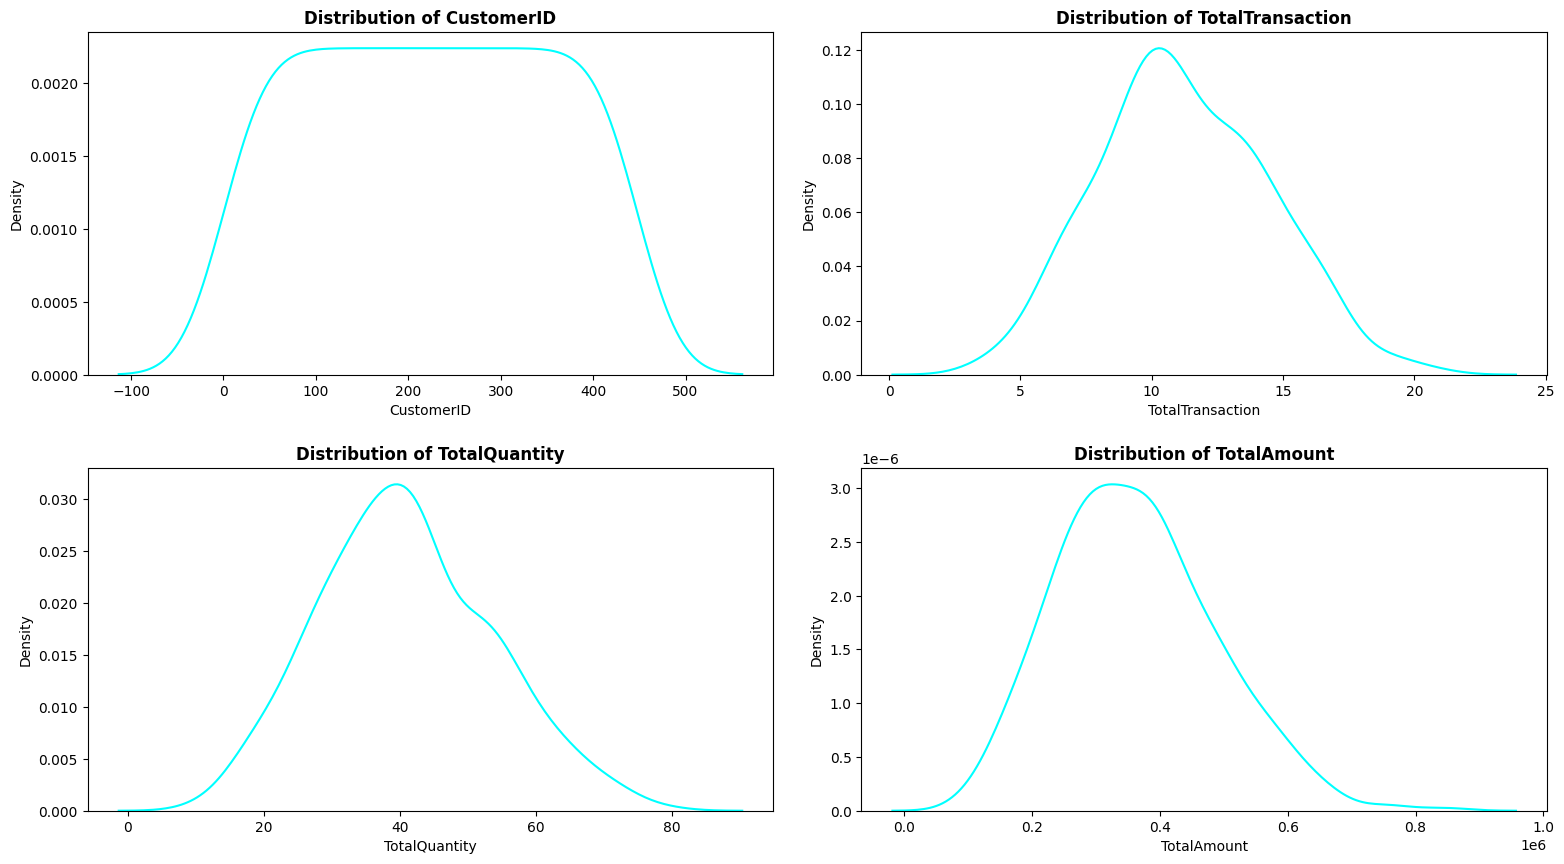

In [14]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 16, 9

for i in range(0, len(dc.columns)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x=dc[dc.columns[i]],
                color='cyan')

    plt.title('Distribution of ' + dc.columns[i],
              fontsize=12,
              fontweight='bold')
    plt.xlabel(dc.columns[i])
    plt.tight_layout(pad=2)

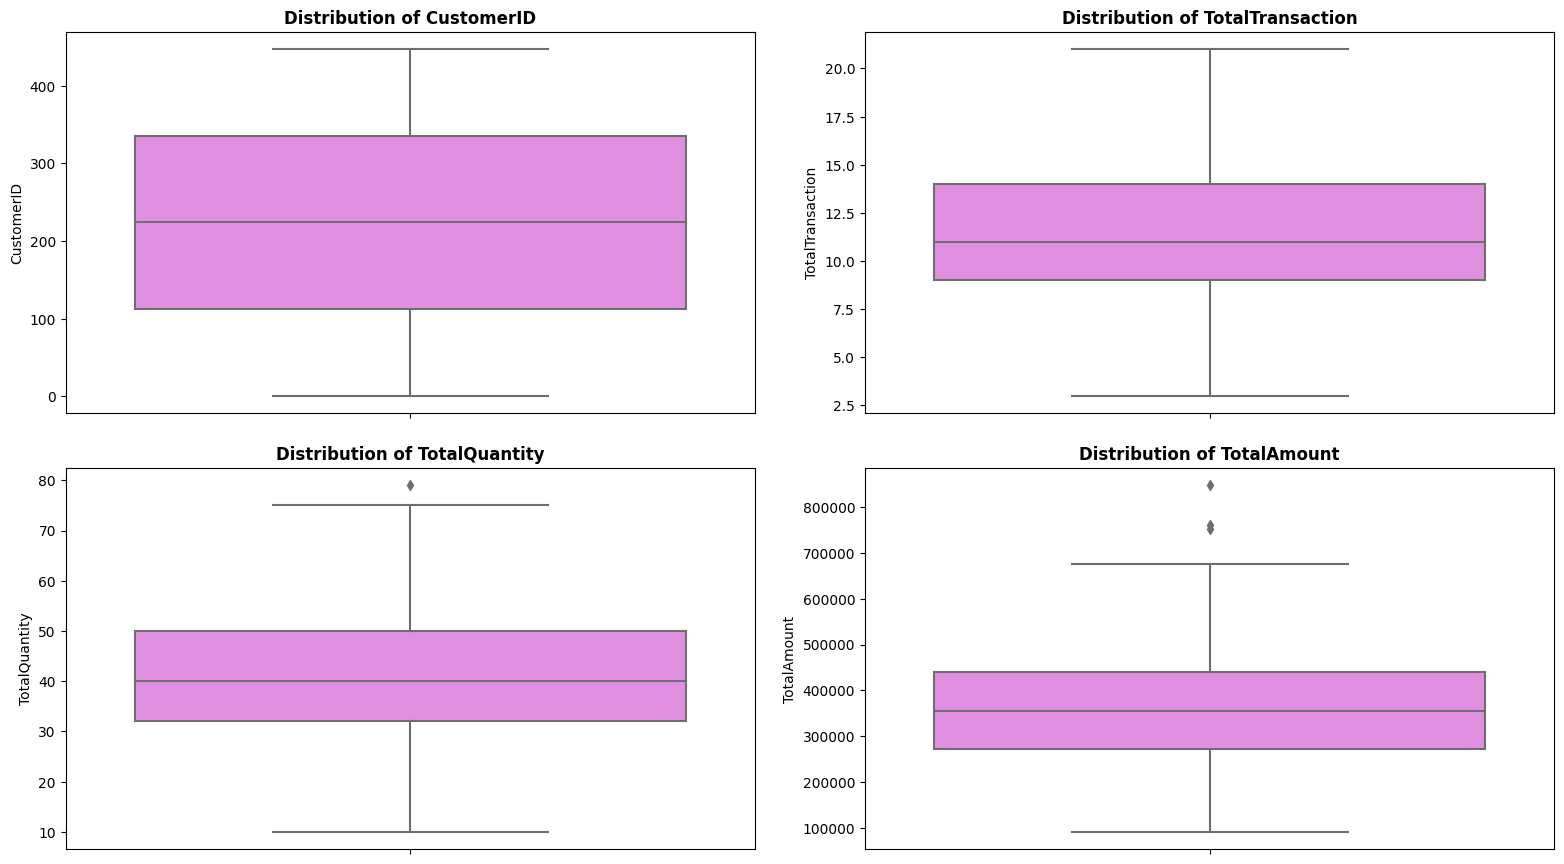

In [15]:
for i in range(0, len(dc.columns)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=dc[dc.columns[i]],
                color='violet')

    plt.title('Distribution of ' + dc.columns[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

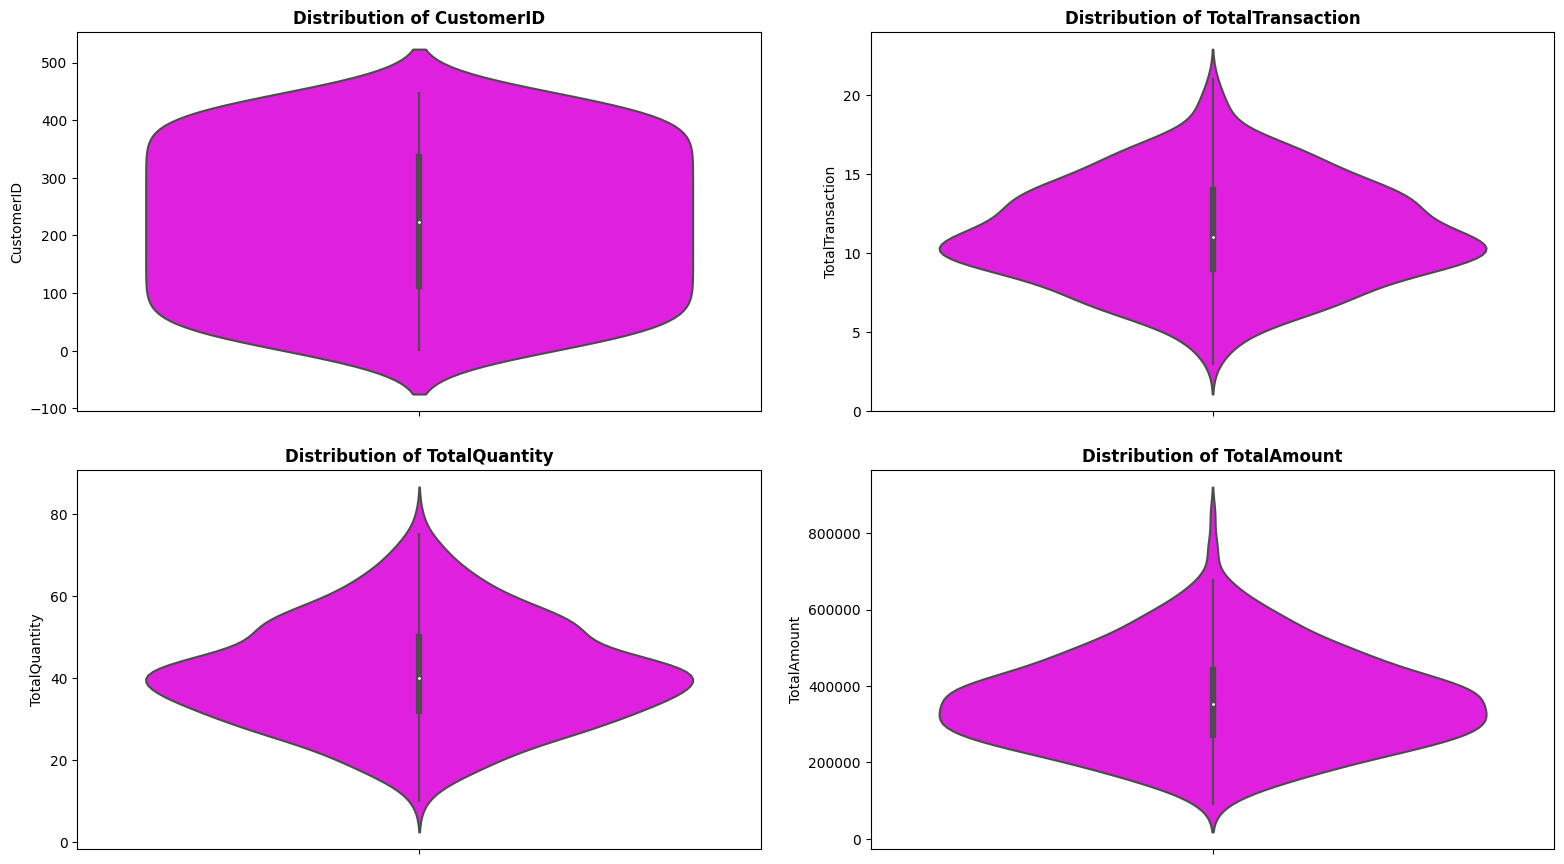

In [16]:
for i in range(0, len(dc.columns)):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(y=dc[dc.columns[i]],
                   color='magenta')

    plt.title('Distribution of ' + dc.columns[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

<Figure size 1600x1600 with 0 Axes>

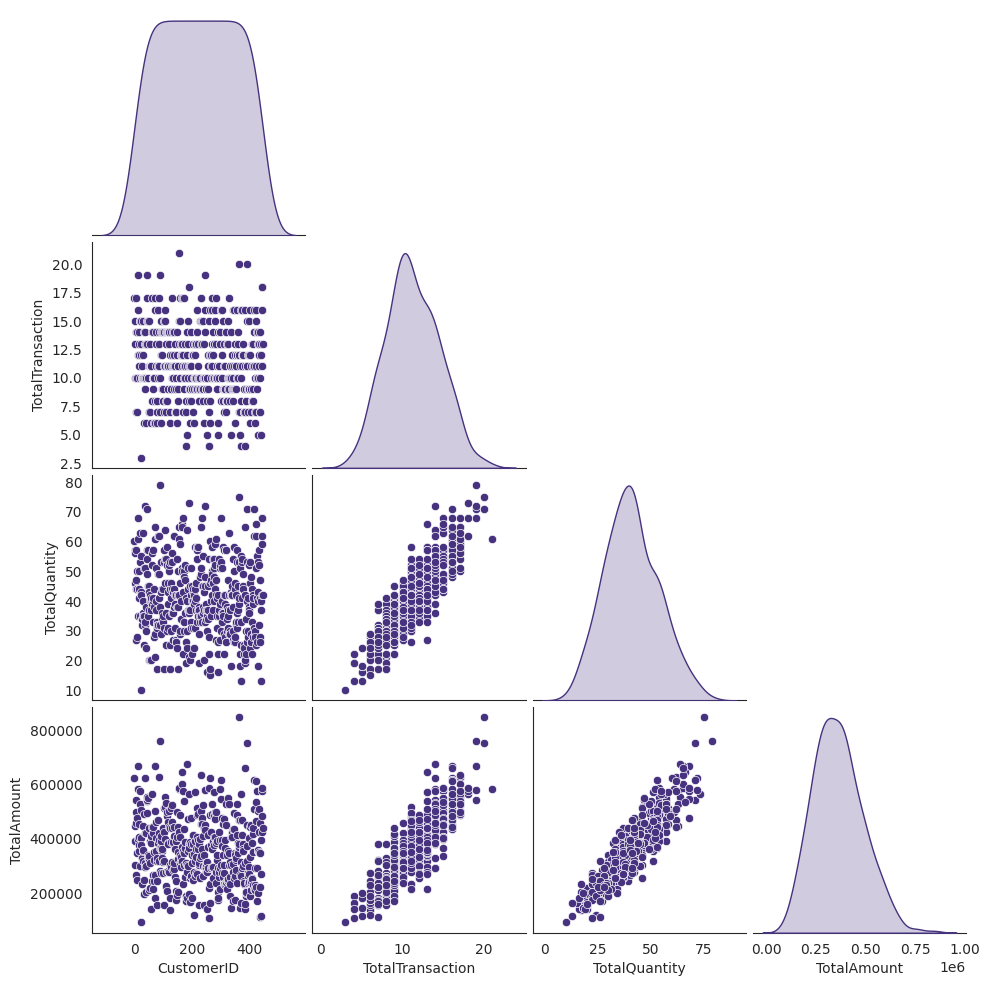

In [17]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.set_palette('viridis')
sns.pairplot(data=dc,
             diag_kind='kde',
             corner=True)

plt.show()

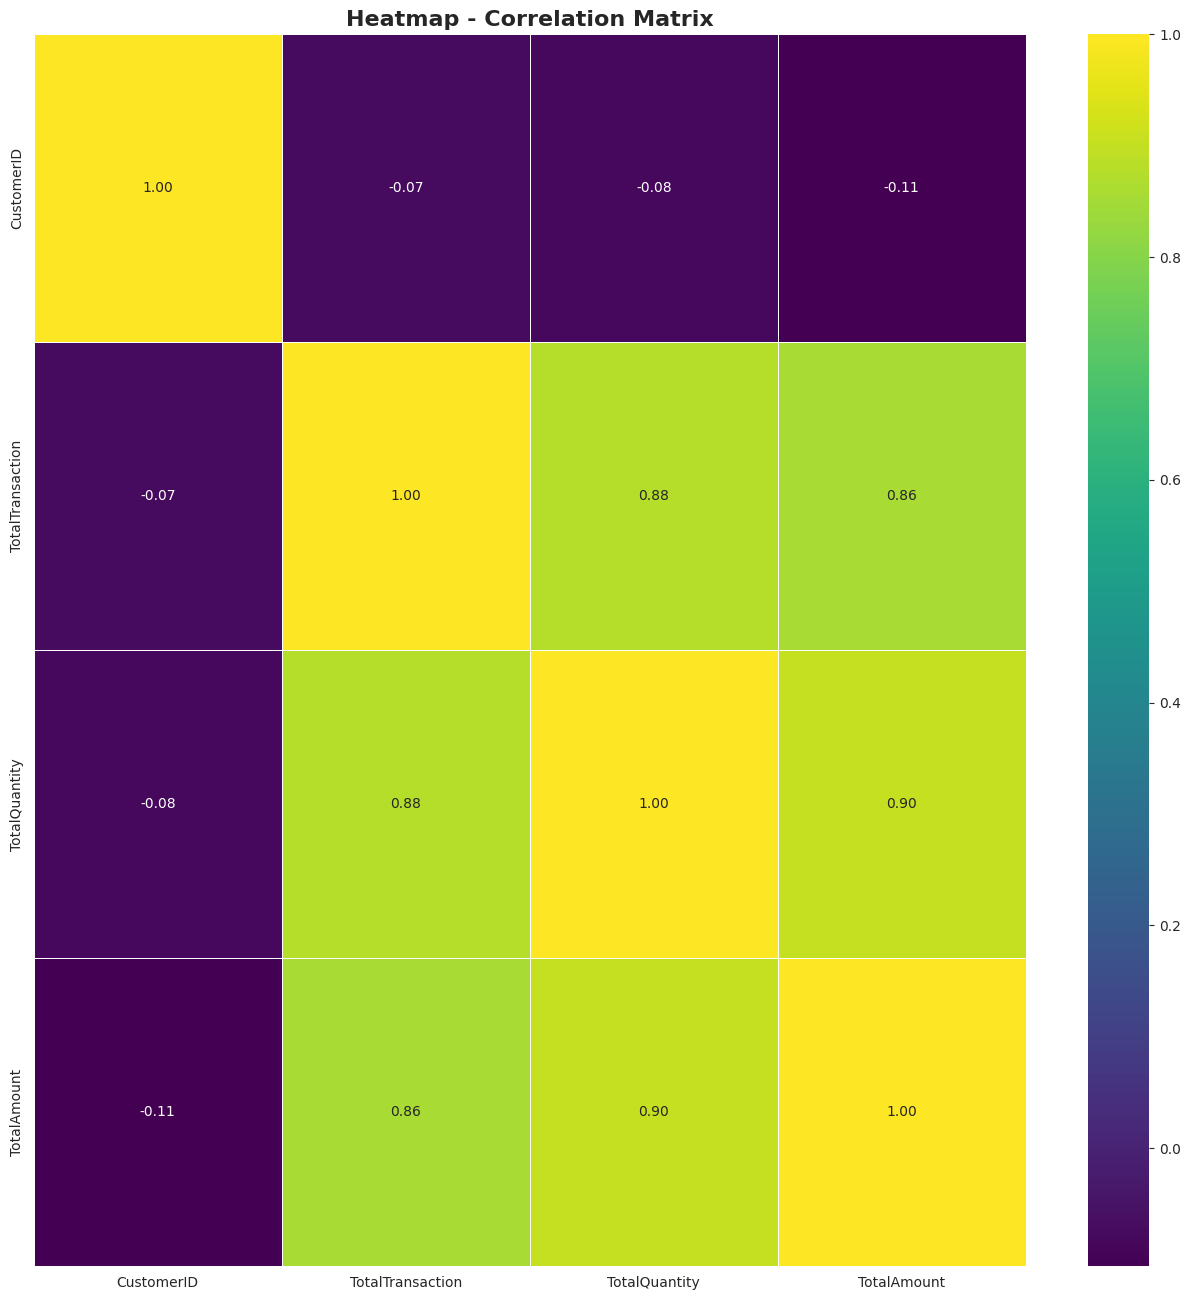

In [18]:
plt.figure(figsize=(16, 16))

sns.heatmap(data=dc.corr(),
            cmap='viridis',
            annot=True,
            fmt='.2f',
            linewidths=0.5)
plt.title(label='Heatmap - Correlation Matrix',
          fontsize=16,
          fontweight='bold')
plt.show()

## Feature Scaling: Standardization

In [19]:
model = dc.drop(columns='CustomerID').copy()
model.columns

Index(['TotalTransaction', 'TotalQuantity', 'TotalAmount'], dtype='object')

In [20]:
features = ['txn', 'qty', 'amt']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(model) # Fitting and transforming the data
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df.head()

,txn,qty,amt
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


In [22]:
scaled_df.describe()

,txn,qty,amt
count,4.470000e+02,4.470000e+02,4.470000e+02
mean,-2.583069e-16,2.781767e-17,-1.549842e-16
std,1.001120e+00,1.001120e+00,1.001120e+00
min,-2.538946e+00,-2.427380e+00,-2.172077e+00
25%,-6.880481e-01,-7.008607e-01,-7.290450e-01
50%,-7.108220e-02,-7.303559e-02,-6.676829e-02
75%,8.543667e-01,7.117458e-01,6.320561e-01
max,3.013747e+00,2.987612e+00,3.889221e+00


✅ Nilai mean mendekati 0 dan std mendekati 1.

## Modeling and Evaluation

In [23]:
df_model = scaled_df.copy()

<Figure size 1600x1600 with 0 Axes>

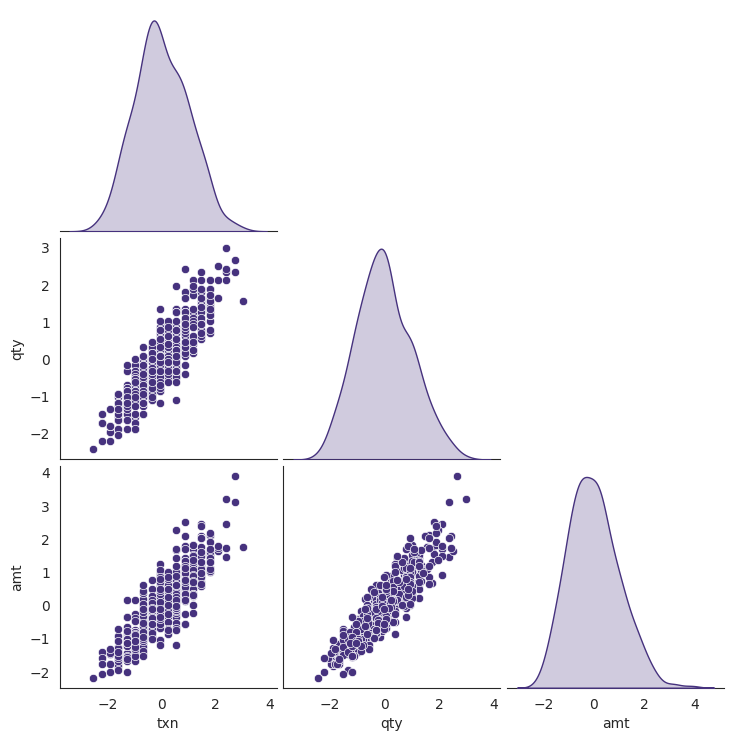

In [24]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.set_palette('viridis')
sns.pairplot(data=df_model,
             diag_kind='kde',
             corner=True)

plt.show()

### Inertia Score

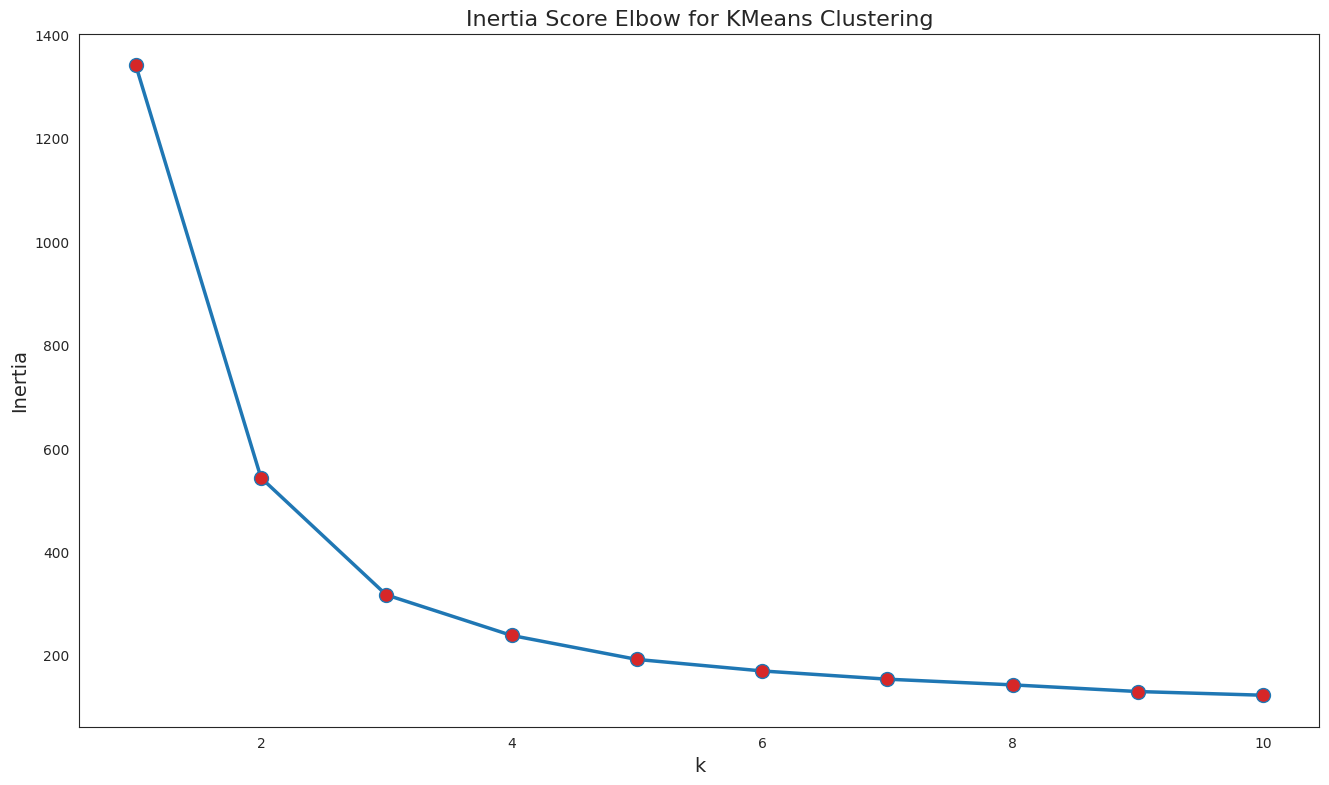

In [25]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,
                    max_iter=200, random_state=100)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 9))
plt.plot(range(1, 11),
         inertia,
         color='tab:blue',
         linewidth=2.5,
         marker='o',
         markerfacecolor='tab:red',
         markersize=10)
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.style.use('ggplot')
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=16)
plt.show()

In [26]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    59.488891
1    41.653749
2    24.739126
3    19.444725
4    11.600829
5     9.376410
6     7.144764
7     9.017581
8     5.484396
9          NaN
dtype: float64

🔎 Observasi
- Dengan parameter inertia score, nilai optimal pada k = 3, karena terjadi penurunan inertia yang tidak terlalu signifikan setelah itu.

### Distortion Score

In [27]:
# pip install yellowbrick

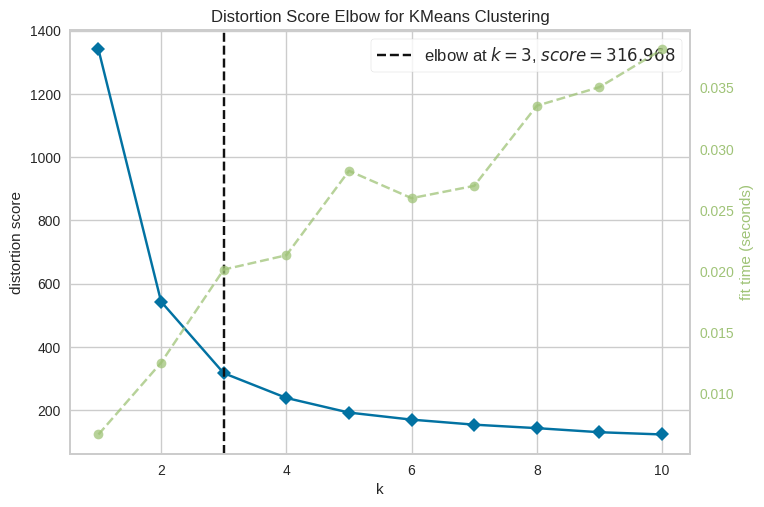

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer

# Fit model
model = KMeans(init='k-means++', n_init=10, max_iter=200, random_state=100)
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_model)
visualizer.show()

🔎 Observasi
- Dengan parameter distortion score, nilai optimal pada k = 3 dengan skor = 316,968.

### Silhouette Score

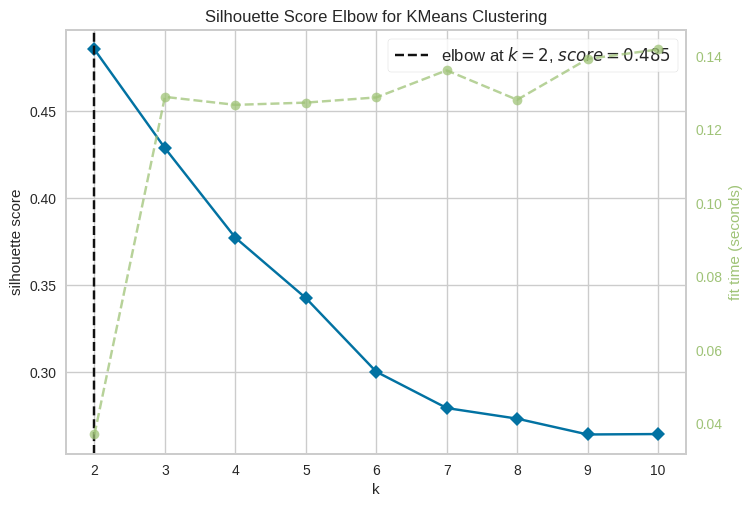

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_init=10, max_iter=200, random_state=100)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_model)
visualizer.show()

🔎 Observasi
- Dengan parameter silhouette score, nilai optimal pada k = 2 dengan skor = 0,485.

### Silhouette Plot

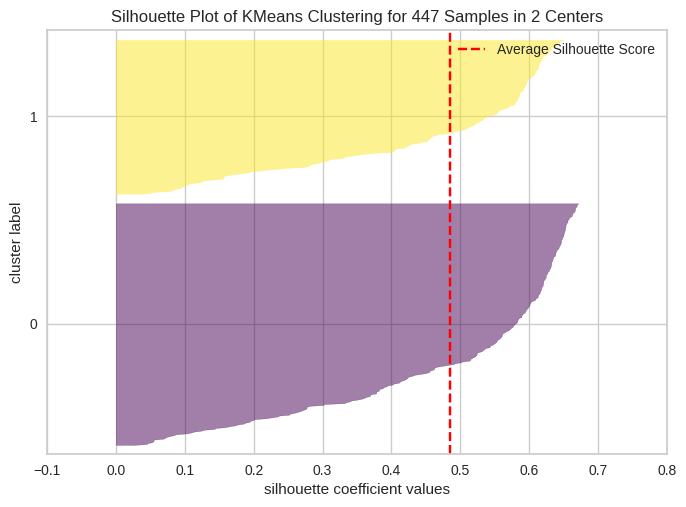

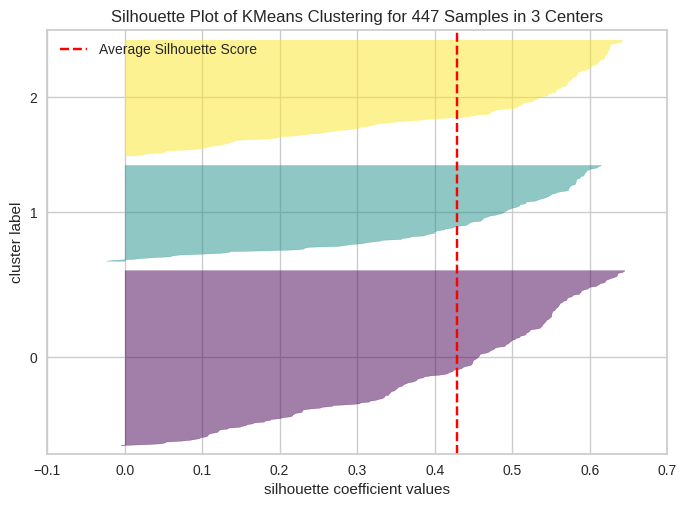

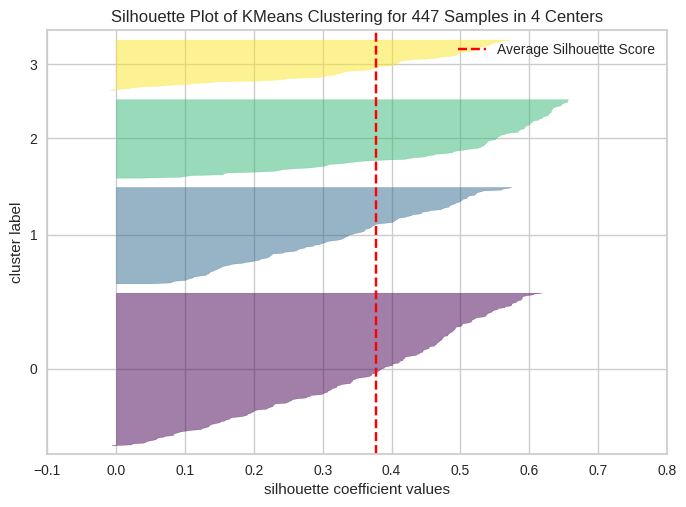

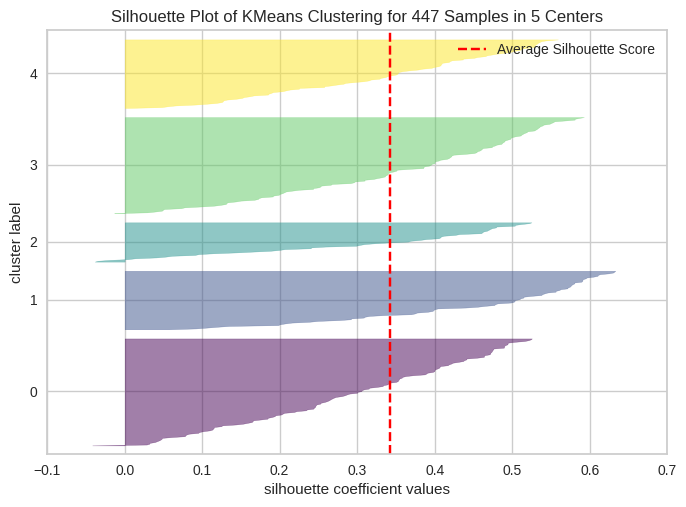

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2, 3, 4, 5]:
    model = KMeans(i, init='k-means++', n_init=10, max_iter=200, random_state=100)
    visualizer = SilhouetteVisualizer(model, colors='viridis')
    visualizer.fit(df_model)
    visualizer.show()

In [31]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2, 10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=100)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
    pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

    plt.figure(figsize=(9, 16))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='viridis')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.show()

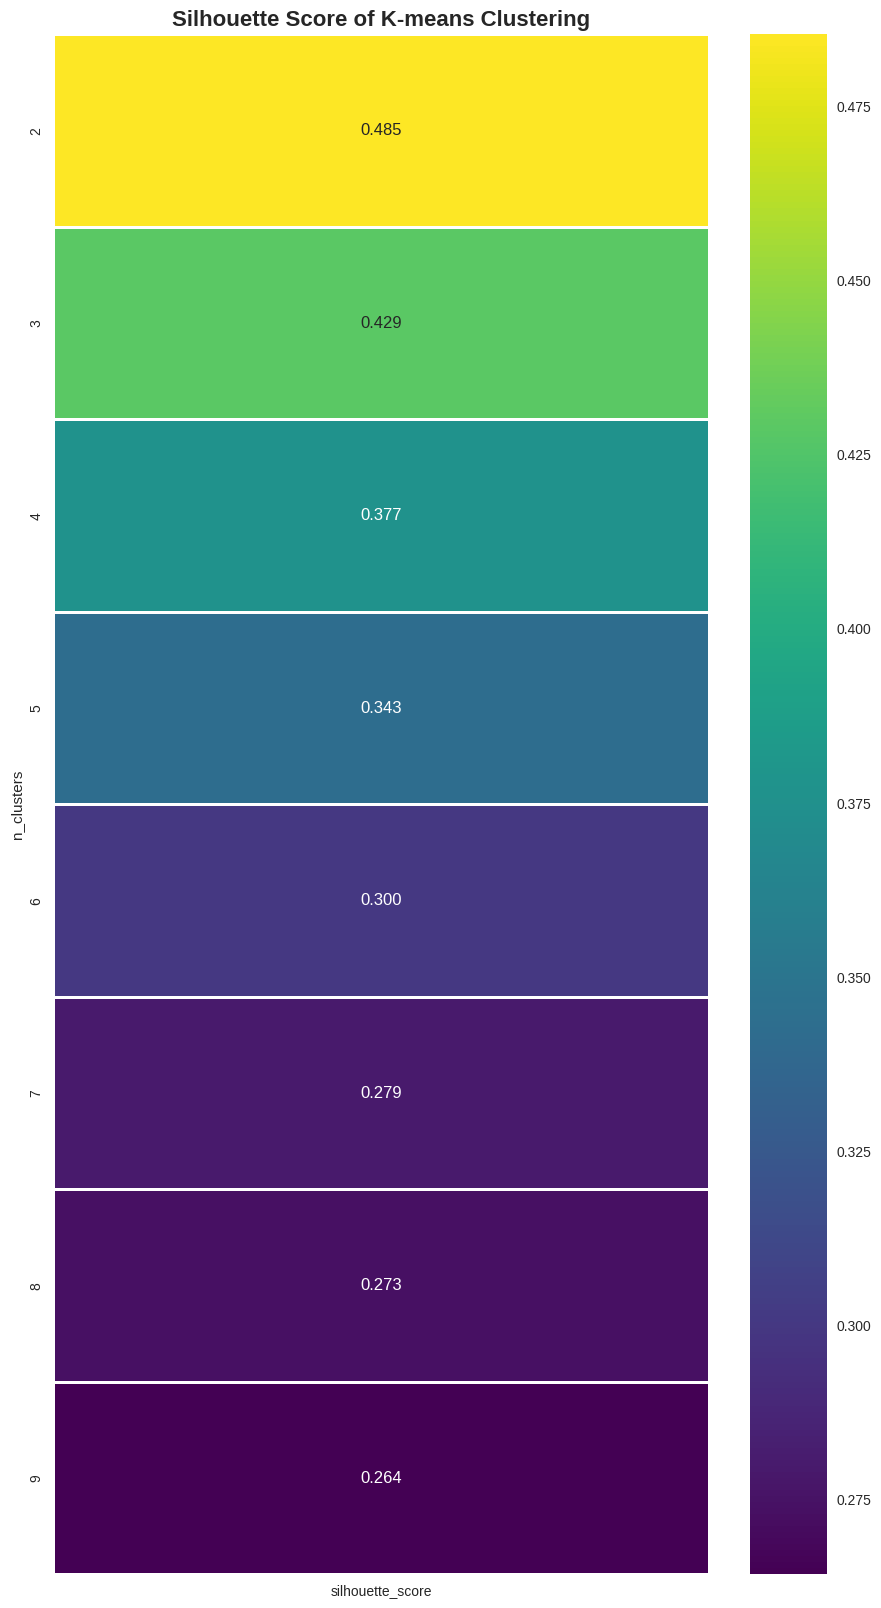

In [32]:
visualize_silhouette_layer(df_model)

🔎 Observasi
- Seperti yang dapat dilihat, berdasarkan analisis yang dilakukan, menunjukkan hasil yang cukup mirip, yaitu nilai optimal pada k = 2. Namun, kita akan menggunakan k = 3 sebagai jumlah klaster pada klasterisasi K-Means, karena pertimbangan berikut:
  - Distortion score
  - Silhouette score (0,429)
- Selain itu, k = 3 lebih baik digunakan untuk segmentasi pelanggan (tidak terlalu sedikit dan tidak terlalu banyak).

In [33]:
model = df_model.copy()

In [34]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=200,
            random_state=100)
km.fit(model)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=100)

### Summary Statistics

In [35]:
# Labels
model['Segment'] = km.labels_
model.groupby('Segment').agg(['std', 'mean', 'median'])

txn                           qty                           amt  \
              std      mean    median       std      mean    median       std   
Segment                                                                         
0        0.466213  0.009856 -0.071082  0.403057  0.015155  0.005443  0.429155   
1        0.548132  1.271236  1.162850  0.554993  1.304927  1.261093  0.652237   
2        0.534863 -1.067897 -0.996531  0.460004 -1.103793 -1.014773  0.422037   

                             
             mean    median  
Segment                      
0       -0.000417 -0.001705  
1        1.293721  1.183886  
2       -1.071036 -1.027853

In [36]:
model.groupby('Segment').count()

,txn,qty,amt
Segment,,,
0,202,202,202
1,111,111,111
2,134,134,134


In [37]:
# Centroids
km.cluster_centers_

array([[ 9.85639499e-03,  1.51551973e-02, -4.16950872e-04],
       [ 1.27123553e+00,  1.30492749e+00,  1.29372137e+00],
       [-1.06789653e+00, -1.10379329e+00, -1.07103618e+00]])

## Customer Segmentation Analysis

In [38]:
plt.figure(figsize=(16, 9))

fig = px.scatter_3d(data_frame=model,
                    x='txn',
                    y='qty',
                    z='amt',
                    color='Segment',
                    color_continuous_scale='viridis',
                    size_max=10)

fig.update_layout(title='Customer Segmentation', title_font_size=16)

fig.show()

<Figure size 1600x900 with 0 Axes>

## Principal Component Analysis (PCA)

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(model)
pca_tf = pca.transform(model)

pca_df = pd.DataFrame(pca_tf, columns=['pc1', 'pc2', 'pc3', 'pc4'])
pca_df.describe()

,pc1,pc2,pc3,pc4
count,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02
mean,2.384372e-17,1.986976e-18,9.934882e-18,3.973953e-18
std,1.705758e+00,7.627797e-01,3.862639e-01,3.102470e-01
min,-4.278101e+00,-1.060811e+00,-1.276566e+00,-7.407366e-01
25%,-1.387545e+00,-7.979534e-01,-2.445221e-01,-2.303038e-01
50%,9.453804e-02,4.316416e-01,-6.449870e-03,-9.714195e-03
75%,1.165376e+00,6.900824e-01,2.477293e-01,2.285413e-01
max,5.138495e+00,1.516676e+00,1.353413e+00,9.044516e-01


Explained variance: [2.90960984 0.58183282 0.14919981 0.09625322]
Explained variance ratio: [0.77861682 0.15569951 0.03992614 0.02575754]


<BarContainer object of 4 artists>

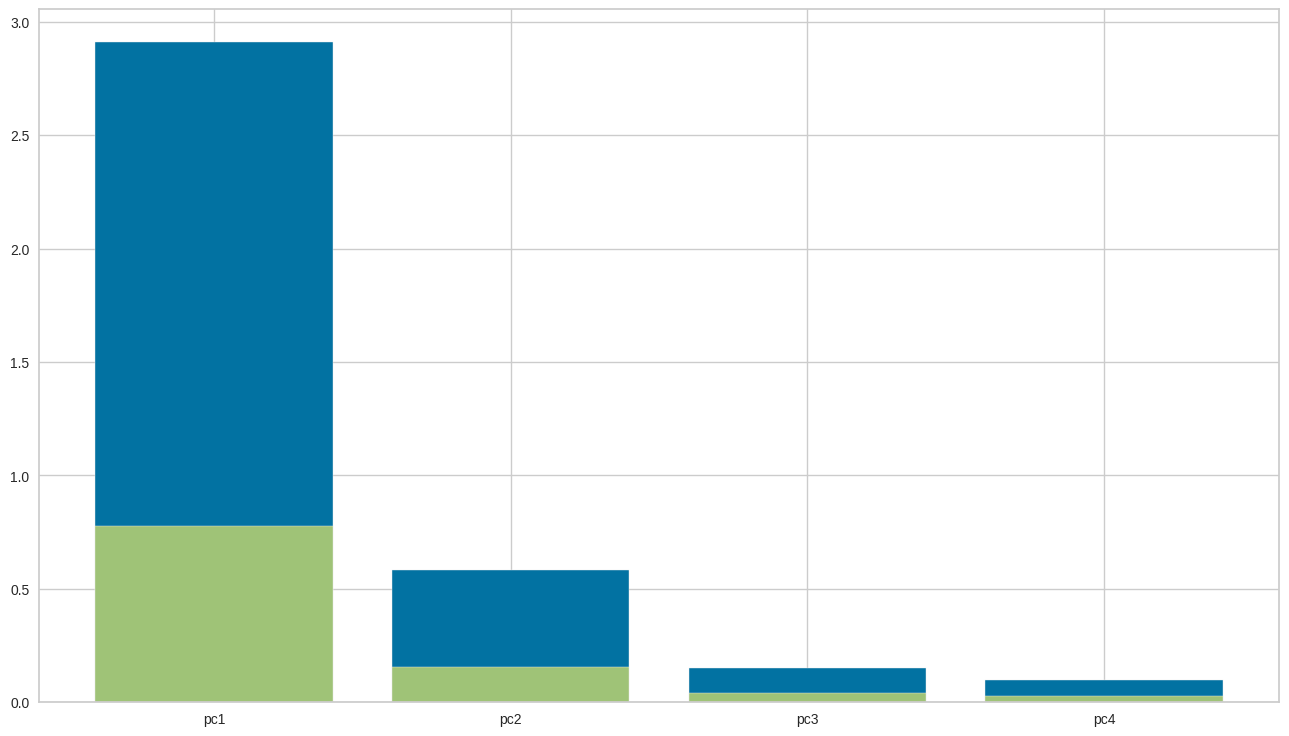

In [40]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.figure(figsize=(16, 9))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_)
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_ratio_)

<Figure size 1600x1600 with 0 Axes>

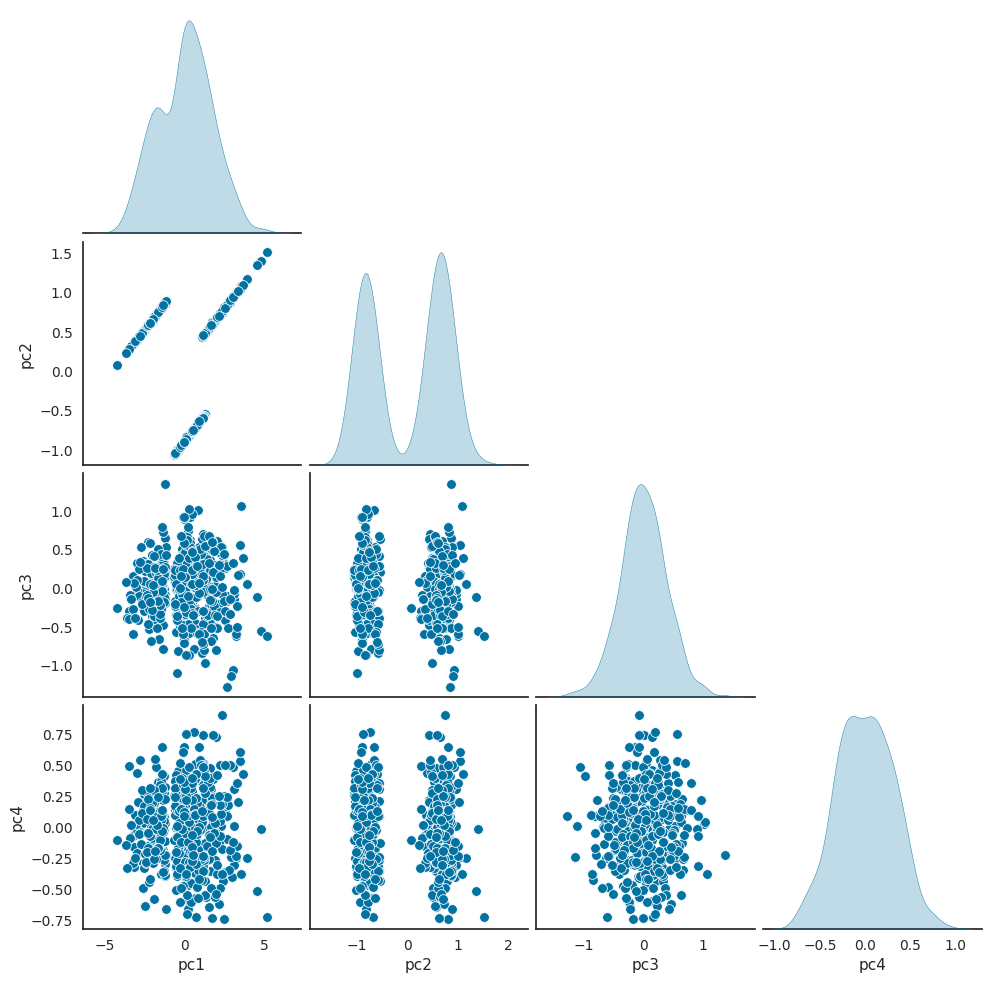

In [41]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.pairplot(data=pca_df,
             palette='viridis',
             diag_kind='kde',
             corner=True)

plt.show()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(model)
pca_tf = pca.transform(model)
pca_df = pd.DataFrame(data=pca_tf, columns=['pc1', 'pc2'])
pca_df['Segment'] = model['Segment']
pca_df.head()

,pc1,pc2,Segment
0,2.960384,0.938910,1
1,1.108449,0.431642,1
2,1.647479,0.579858,1
3,-0.040786,-0.899652,0
4,-2.051102,0.659953,2


<Figure size 1600x1600 with 0 Axes>

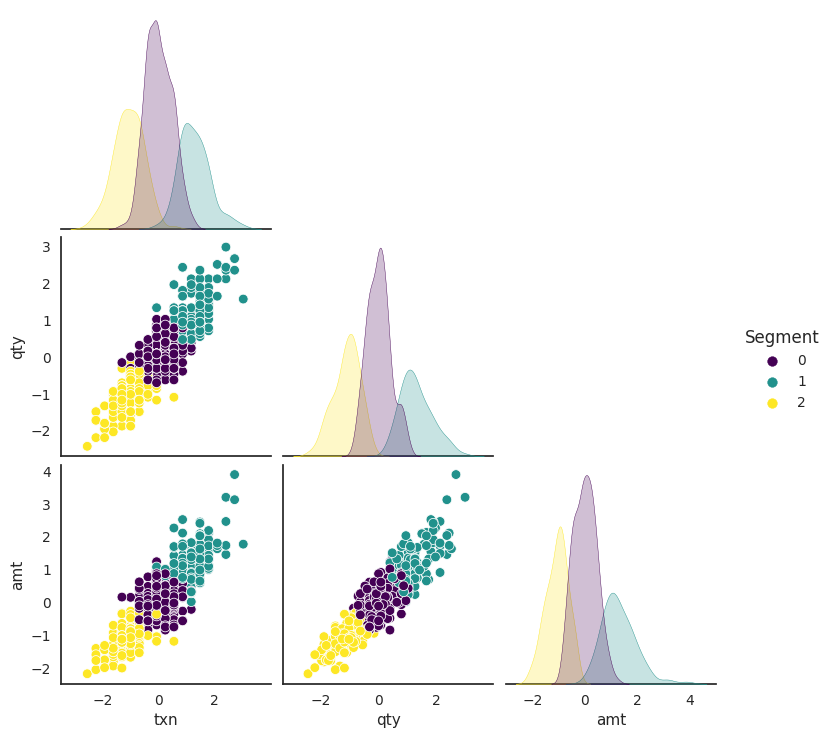

In [43]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.pairplot(data=model,
             hue='Segment',
             palette='viridis',
             diag_kind='kde',
             corner=True)

plt.show()

<Figure size 1600x1600 with 0 Axes>

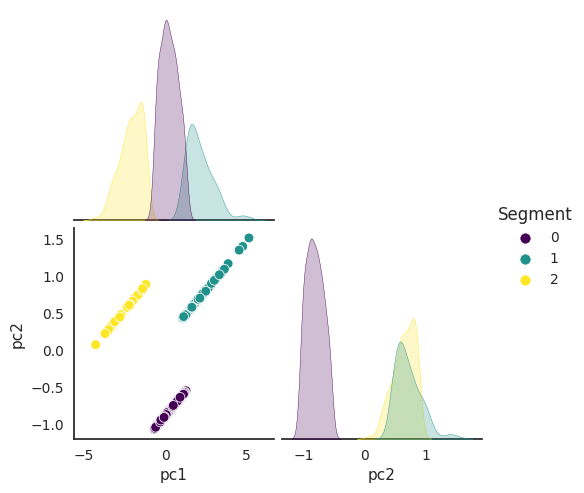

In [44]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.pairplot(data=pca_df,
             hue='Segment',
             palette='viridis',
             diag_kind='kde',
             corner=True)

plt.show()

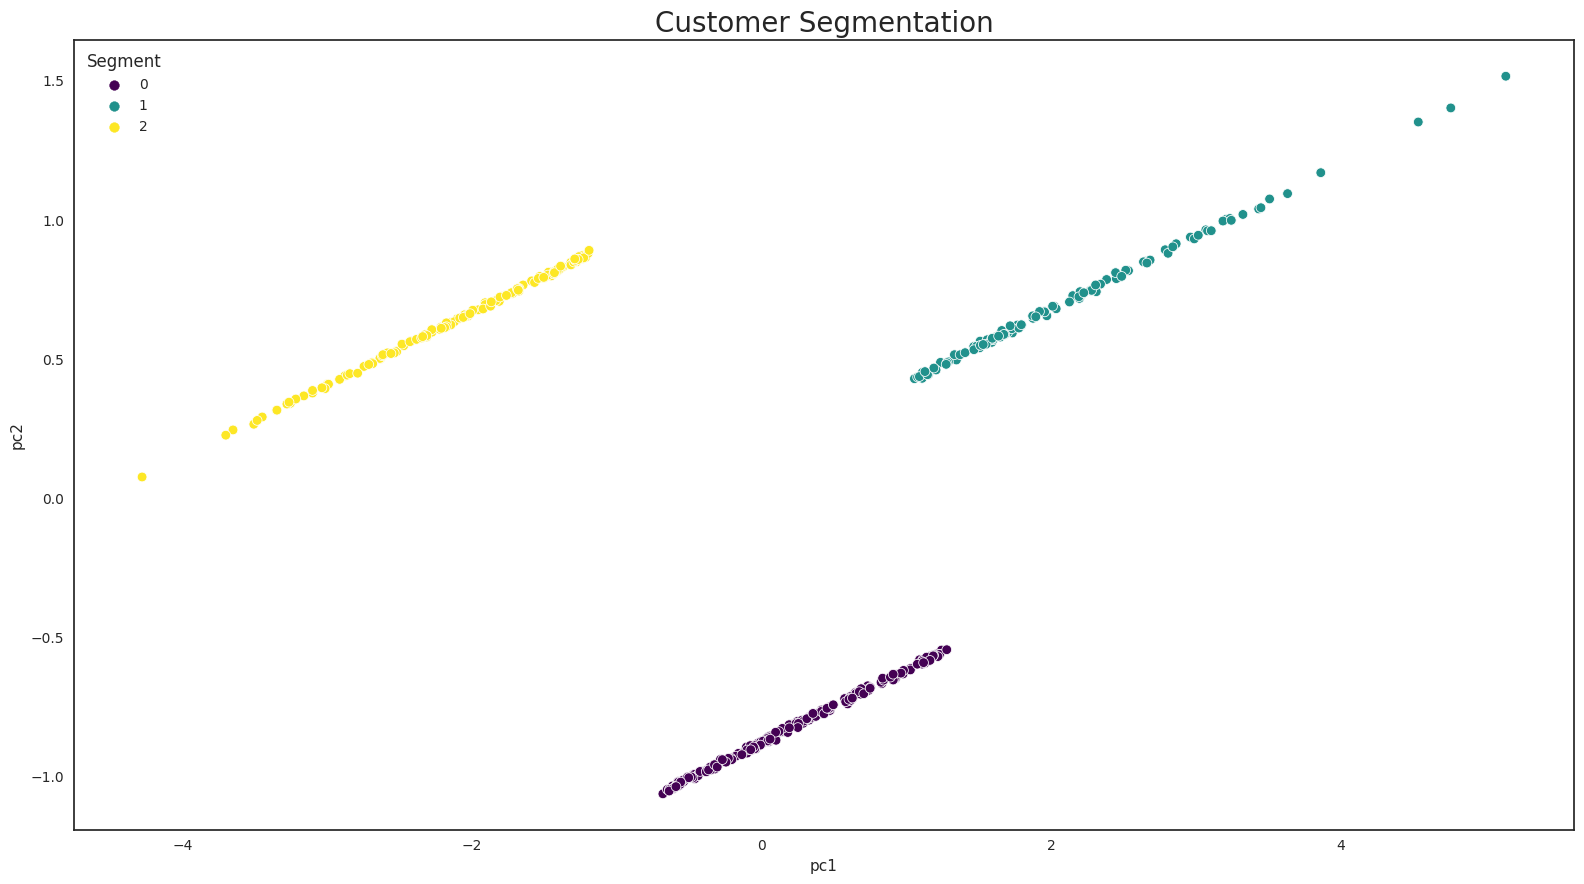

In [45]:
plt.figure(figsize=(16, 9))

sns.scatterplot(data=pca_df,
                x='pc1',
                y='pc2',
                hue='Segment',
                palette='viridis')
plt.title('Customer Segmentation', fontsize=20)
plt.tight_layout()

plt.show()

## Data Summary

In [46]:
data = data_clustering.copy()
data['Segment'] = km.labels_

In [47]:
features = ['TotalTransaction', 'TotalQuantity', 'TotalAmount', 'Segment']
data_summary = data[features]

round(data_summary.groupby('Segment').agg(['median']), 2).round()

,TotalTransaction,TotalQuantity,TotalAmount
,median,median,median
Segment,,,
0,11.0,41.0,362300.0
1,15.0,57.0,509900.0
2,8.0,28.0,234550.0


In [48]:
colors = plt.cm.viridis([0.1, 0.5, 0.9])
# colors = plt.cm.viridis([0.1, 0.4, 0.7, 1.0])

In [49]:
def dist_list(list):
    plt.figure(figsize=[16, 9])
    i = 1
    for col in list:
        ax = plt.subplot(1, 3, i)
        ax.vlines(data[col].median(), ymin=-0.5, ymax=2.5, color='black', linestyle='--')
        g = data.groupby('Segment')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=colors)
        plt.title(col)
        plt.ylabel('Segment')
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        i = i + 1

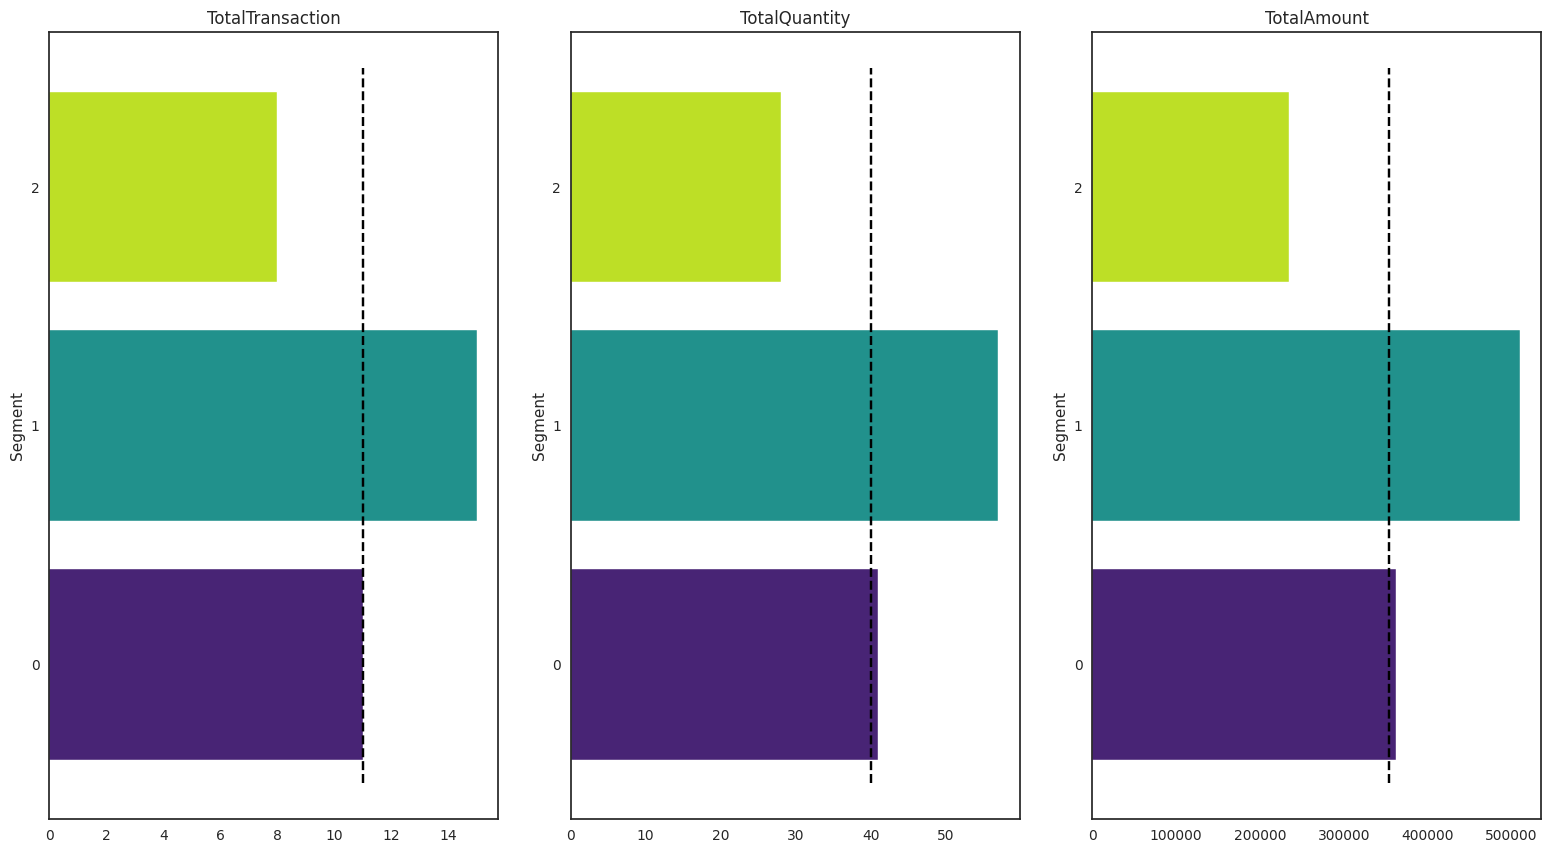

In [50]:
dist_list(['TotalTransaction', 'TotalQuantity', 'TotalAmount'])
plt.tight_layout(pad=2)
plt.show()

🔎 Insights
- Berdasarkan hasil K-Mean Clustering, dapat disimpulkan bahwa karakteristik dari setiap klaster adalah sebagai berikut.
  - Klaster 0
    - Total transaksi sebanyak 11 kali (sebanding dengan rerata transaksi per tahun).
    - Total kuantitas produk sebanyak 41 buah.
    - Total pengeluaran sebesar Rp362.300/tahun.
  - Klaster 1
    - Total transaksi sebanyak 15 kali (di atas rerata transaksi per tahun).
    - Total kuantitas produk sebanyak 57 buah.
    - Total pengeluaran sebesar Rp509.900/tahun.
  - Klaster 2
    - Total transaksi sebanyak 8 kali (di bawah rerata transaksi per tahun).
    - Total kuantitas produk sebanyak 28 buah.
    - Total pengeluaran sebesar Rp234.550/tahun.
- Dari karakteriktik tersebut, masing-masing klaster dapat dimasukkan ke dalam segmen berikut.
  - Klaster 0: Segmen *Moderate Customer*
  - Klaster 1: Segmen *High Customer*
  - Klaster 2: Segmen *Low Customer*

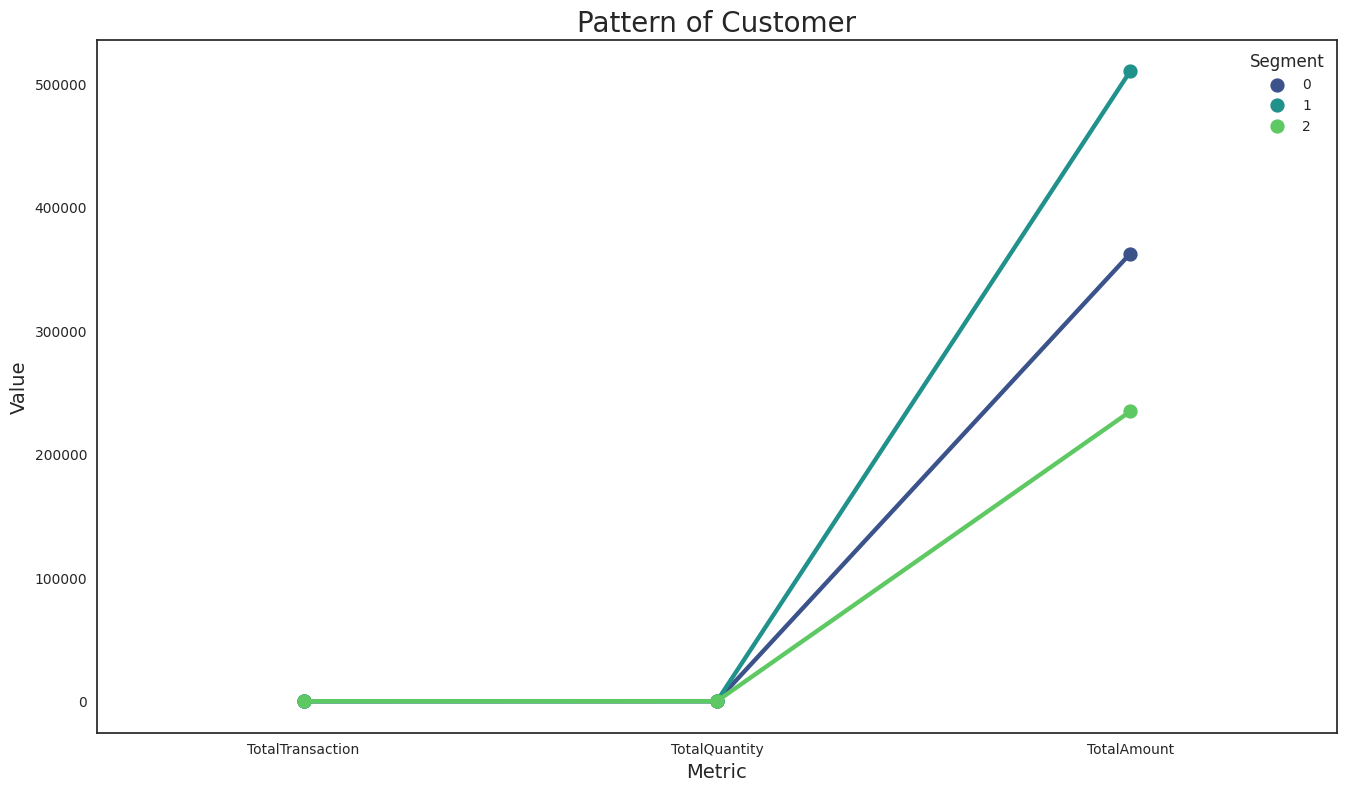

In [51]:
segment_med = data.groupby('Segment').median().reset_index()

df_melt = pd.melt(segment_med.reset_index(),
                  id_vars='Segment',
                  value_vars=['TotalTransaction', 'TotalQuantity', 'TotalAmount'],
                  var_name='Metric',
                  value_name='Value')

plt.figure(figsize=(16, 9))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Segment', palette='viridis')
plt.title('Pattern of Customer', fontsize=20)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

## Model Interpretation and Recommendation

### Percentage of Segment Population

In [52]:
segment_percent = data_summary['Segment'].value_counts().reset_index()
segment_percent.columns = ['Segment', 'Count']
segment_percent['Percentage (%)'] = round((segment_percent['Count'] / len(data_summary)) * 100, 1)
segment_percent = segment_percent.sort_values(by=['Segment']).reset_index(drop=True)
segment_percent

,Segment,Count,Percentage (%)
0,0,202,45.2
1,1,111,24.8
2,2,134,30.0


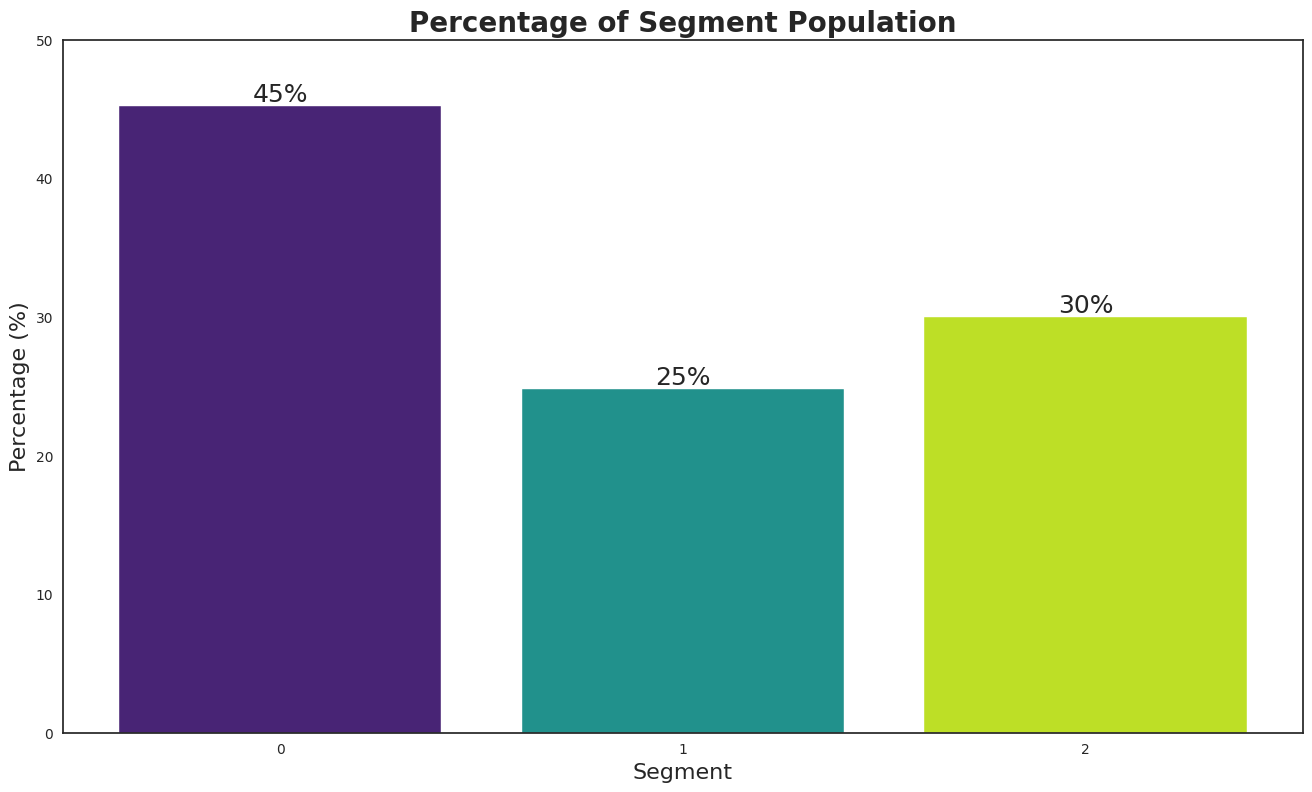

In [53]:
fig, ax = plt.subplots(figsize=(16, 9))
bars = plt.bar(x=segment_percent['Segment'], height=segment_percent['Percentage (%)'], color=colors)

plt.title('Percentage of Segment Population', fontsize=20, fontweight='bold')
plt.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=18)
plt.xlabel('Segment', fontsize=16)
plt.xticks(range(0, 3))
plt.ylabel('Percentage (%)', fontsize=16)
plt.ylim(0, 50)
plt.show()

🔎 Insights
- Berdasarkan hasil analisis, diketahui bahwa:
  - Segmen *Moderate Customer*
    - Segmen ini merupakan segmen terbesar dari keseluruhan pelanggan, mencakup 45% dari total pelanggan.
    - Karakteristik utama dari segmen ini adalah memiliki jumlah pembelian dan pengeluaran yang sedang.
    - Perusahaan dapat memanfaatkan potensi pertumbuhan dari segmen ini dengan memberikan perhatian lebih pada mereka.
  - Segmen *High Customer*
    - Segmen ini memiliki jumlah pembelian dan pengeluaran yang tinggi, meskipun memiliki populasi yang paling kecil dari keseluruhan pelanggan.
    - Segmen ini memiliki potensi besar untuk memberikan kontribusi pendapatan yang signifikan bagi perusahaan.
    - Perusahaan dapat merancang strategi bisnis yang efektif untuk menjangkau segmen ini untuk memaksimalkan potensi pertumbuhan dari mereka.
  - Segmen *Low Customer*
    - Segmen ini memiliki jumlah pembelian dan pengeluaran yang rendah, dan memiliki transaksi paling rendah dari keseluruhan pelanggan.
    - Namun, potensi peningkatan transaksi masih ada, sehingga perusahaan dapat memperkuat aktivitas pembelian dari segmen ini.
    - Perusahaan dapat mendorong peningkatan transaksi dengan memberikan penawaran menarik kepada segmen ini.